<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Melanie Walsh](https://melaniewalsh.org/) for the 2022 Text Analysis Pedagogy Institute, with support from the [National Endowment for the Humanities](https://neh.gov), [JSTOR Labs](https://labs.jstor.org/), and [University of Arizona Libraries](https://new.library.arizona.edu/).

For questions/comments/improvements, email melwalsh@uw.edu
____

# Working with Twitter Data (Lesson 1) — 6/20/2022

This is lesson **1** of 3 in the educational series on **Working with Twitter Data**. This notebook will demonstrate how researchers can collect tweets, save tweets as spreadsheet files, and visualize tweets as an interactive timeline and a word cloud. 

**Audience:** Teachers / Learners / Researchers

**Use case:** Tutorial / How-To

**Difficulty:** Beginner to Intermediate

**Completion time:** 30 minutes to 1 hour

**Knowledge Required/Recommended:** 

* Command line knowledge
* Python basics (variables, functions, lists, dictionaries)
* Pandas basics (Python library for data manipulation and analysis)


**Learning Objectives:**
After this lesson, learners will be able to:

1. Collect tweets for any query
2. Save tweets as a spreadsheet file
3. Visualize tweets as an interactive timeline
4. Visualize tweets as a word cloud

___

# Required Python Libraries
* [twarc2](https://twarc-project.readthedocs.io/en/latest/twarc2_en_us/) for collecting Twitter data.
* [plotly](https://plotly.com/python/) for making interactive plots 
* [pandas](https://pandas.pydata.org/) for manipulating and cleaning data

## Install Required Libraries

In [ ]:
### Install Libraries ###
!pip install twarc --upgrade
!pip install twarc-csv --upgrade
!pip install plotly

In [1]:
### Import Libraries ###
import plotly.express as px
import pandas as pd
import plotly.io as pio
pio.renderers.default = "iframe"
# Set max column width
pd.options.display.max_colwidth = 400
# Set max number of columns
pd.options.display.max_columns = 95

# Twitter API Setup

To collect Twitter data, we're going to work with the [Twitter API](https://developer.twitter.com/en/docs/basics/getting-started) and [twarc2](https://twarc-project.readthedocs.io/en/latest/twarc2/), a Python package for collecting Twitter data through the Twitter API.

To use the Twitter API and twarc, we first need to complete the following steps:

1. Apply for a Twitter developer account, which also requires making or already having a regular Twitter account

2. Get Twitter API keys

3. Configure/set up twarc

The following instructions will help guide you through this process.

## 1. Apply for a Twitter Developer Account

If you are an academic researcher (e.g., "post-doc, professor, fellow, master's student working on a thesis, PhD candidate, or affiliated with an academic institution AND have a clearly defined project"), you can apply for [the Academic Research track]( https://developer.twitter.com/en/portal/petition/academic/is-it-right-for-you) of the Twitter API, which enables access to all Twitter data.

If you are an undergraduate student or not affiliated with an academic institution, you can apply for [a developer account with essential access](https://developer.twitter.com/en/apply-for-access), which enables access to tweets from the last week as well as tweets in real time. 

## 2. Get API Keys and Bearer Token

Once you've applied for a developer account and had it approved by Twitter, you need to generate your API keys and bearer token — the special passwords that will allow you to work with the Twitter API. To generate your API keys and bearer token, you can follow [these instructions](https://github.com/twitterdev/getting-started-with-the-twitter-api-v2-for-academic-research/blob/main/modules/4-getting-your-keys-and-token.md) from Suhem Parack, the Developer Advocate for Academic Research at Twitter.

After you generate your API keys and bearer token, you should record them in a secure location on your computer (do not share them on the internet because these are private like passwords!).

## 3. Configure Twarc

Once twarc is installed, you need to configure it with your API keys and/or bearer token so that you can actually access the API. 

To configure twarc, you would typically run `twarc2 configure` from the command line. This will prompt twarc to ask for your bearer token, which you can copy and paste into the blank after the colon, and then press enter. You can optionally enter your API keys, as well.

<div class="admonition attention" name="html-admonition" style="background: orange; padding: 10px">
<p class="title">Note</p>
   To get your Bearer Token, go to your Twitter Developer portal: <a href= "https://developer.twitter.com/en/portal/dashboard">https://developer.twitter.com/en/portal/dashboard</a>

</div>

However, when working in a Jupyter notebook in the cloud, it is easiest to configure twarc and enter your Bearer Token in a single command. Please paste your Bearer Token between the quotations marks below and run the cell.

In [ ]:
!printf '%s\n' "YOUR BEARER TOKEN HERE" "no" | twarc2 configure

If you've entered your information correctly, you should get a congratulatory message that looks something like this:

Now you're ready to collect and analyze tweets!

# Twitter Data Collection & Visualization
## Get Tweet Counts and Save as Spreadsheet

The first thing we're going to do is retrieve "tweet counts" — that is, retrieve the number of tweets that include a given query each day in Twitter's history.

The [tweet counts API endpoint](https://twittercommunity.com/t/introducing-new-tweet-counts-endpoints-to-the-twitter-api-v2/155997) is a convenient feature of the v2 API (first introduced in 2021) that allows us to get a sense of how many tweets will be returned for a given query before we actually collect all the tweets that match the query. We won't get the text of the tweets or the users who tweeted the tweets or any other relevant data. We will simply get the number of tweets that match the query. This is helpful because we might be able to see that the search query matches too many tweets, which would encourage us to narrow our search by modifying the query. 

The tweet counts API endpoint is perhaps even more useful for research projects that are primarily interested in tracking the volume of a Twitter conversation over time. In this case, tweet counts enable a researcher to retrieve this information in a way that's faster and easier than retrieving all tweets and relevant metadata.

To get tweet counts from Twitter's entire history with twarc2, we will use [`twarc2 counts`](https://twarc-project.readthedocs.io/en/latest/twarc2/#counts) followed by a search query.

We will also use the flag `--csv` because we want to output the data as a CSV, the flag `--archive` because we're working with the Academic Research track of the Twitter API and want access to the full archive, and the flag `--granularity day` to get tweet counts per day (other options include `hour` and `minute`.  Finally, we write the data to a CSV file.

To see other options, please refer to [twarc's documentation for `twarc2 counts`](https://twarc-project.readthedocs.io/en/latest/twarc2/#counts)

<div class="admonition attention" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="title">Attention 🚨</p>
    Remember that the <code>--archive</code> flag and full-archive search functionality is only available to those who have an <a href= "https://developer.twitter.com/en/products/twitter-api/academic-research">Academic Research account</a>. 
    Students with Essential API access should remove the <code>--archive</code> flag from the code below.

</div>

In [84]:
!twarc2 counts "TGIF" --csv --archive --start-time "2022-01-01" --granularity day  > tgif-tweet-counts.csv
#!twarc2 counts "TGIF" --csv --granularity day  > tgif-tweet-counts.csv

## Visualize Tweets as Timeline

We can make a timeline of these tweet counts by reading in the CSV file with Pandas, totaling the tweets for each day, month, or year, and then creating a line plot with the plotly (`px`) library.

<div class="admonition pandasreview" name="html-admonition" style="background: black; color: white; padding: 10px">
<p class="title">Pandas</p>
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in Introduction to Cultural Analytics & Python!
    
</div>

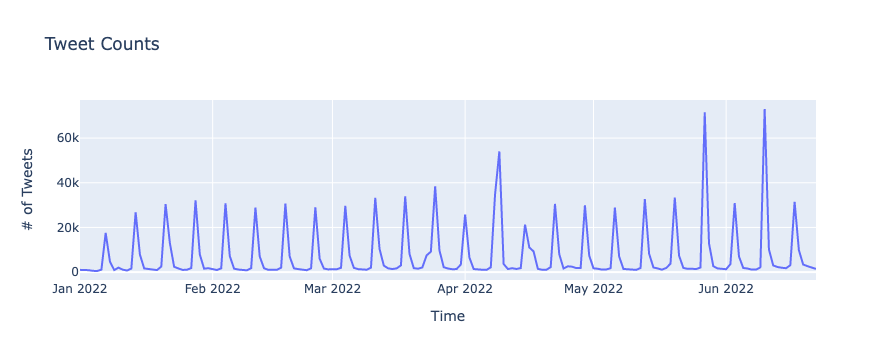

In [122]:
# Change the title of the plot here
my_title = "Tweet Counts"
# Change the file name here
filename = "tgif-tweet-counts.csv"

# Read in CSV as DataFrame
tweet_counts_df = pd.read_csv(filename, parse_dates=['start', 'end'])

# Set start time as DataFrame index
tweet_counts_df.set_index('start', inplace=True)

# Regroup, or resample, tweets by month, day, or year
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
# Uncomment to choose which time span to group by
#grouped_count = tweet_counts_df.resample('M')['day_count'].sum().reset_index() # Month
grouped_count = tweet_counts_df.resample('D')['day_count'].sum().reset_index() # Day
#grouped_count = tweet_counts_df.resample('Y')['day_count'].sum().reset_index() # Year

# Make a line plot from the DataFrame and specify x and y axes, axes titles, and plot title
px.line(grouped_count, x = 'start', y = 'day_count',
    labels = {'start': 'Time', 'day_count': '# of Tweets'},
    title = my_title)

If you want to alter this visualization, I would recommend referring to the documentation for Pandas and Plotly. For example, to see all possible date/time groupings beyond day, month, year, see the [Pandas documentation here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects). To see other kinds of plots that you can make, see the [Plotly documentation here](https://plotly.com/python/).

## Save Tweet Counts as Spreadsheets

We can output the aggregated tweets as a CSV file and visualize this data with any tool we want, such as [Data Wrapper](https://www.datawrapper.de/).

In [24]:
# Regroup, or resample, tweets by month, day, or year
# Uncomment to choose which time span to group by
#grouped_count = tweet_counts_df.resample('M')['day_count'].sum().reset_index() # Month
grouped_count = tweet_counts_df.resample('D')['day_count'].sum().reset_index() # Day
#grouped_count = tweet_counts_df.resample('Y')['day_count'].sum().reset_index() # Year

grouped_count.to_csv("tweet-counts-grouped.csv", index=False)

Sample visualization made with Data Wrapper: https://www.datawrapper.de/_/RbYnj/

In [28]:
%%html
<iframe title="TGIF Tweets" aria-label="Interactive line chart" id="datawrapper-chart-RbYnj" src="https://datawrapper.dwcdn.net/RbYnj/1/" scrolling="no" frameborder="0" style="border: none;" width="685" height="478"></iframe>

## Your Turn!

In [13]:
!twarc2 counts "your query" --csv --archive --granularity day > query-tweet-counts.csv

In [ ]:
# Change the title of the plot here
my_title = "YOUR TITLE HERE"
# Change the file name here
filename = "YOUR FILENAME HERE"

# Read in CSV as DataFrame
tweet_counts_df = pd.read_csv(filename, parse_dates=['start', 'end'])

# Set start time as DataFrame index
tweet_counts_df.set_index('start', inplace=True)

# Regroup, or resample, tweets by month, day, or year
grouped_count = tweet_counts_df.resample('M')['day_count'].sum().reset_index() # Month
#grouped_count = tweet_counts_df.resample('D')['day_count'].sum().reset_index() # Day
#grouped_count = tweet_counts_df.resample('Y')['day_count'].sum().reset_index() # Year

# Make a line plot from the DataFrame and specify x and y axes, axes titles, and plot title
px.line(grouped_count, x = 'start', y = 'day_count',
    labels = {'start': 'Time', 'day_count': '# of Tweets'},
    title = my_title)

## Twitter API Queries

To collect tweets from the Twitter API, we need to make queries, or requests for specific kinds of tweets — e.g., `twarc2 search *query*`. The simplest kind of query is a keyword search, such as the phrase "David Foster Wallace bro," which should return any tweet that contains all of these words in any order — `twarc2 search "plums in the icebox"`.

There are many other operators that we can add to a query, which would allow us to collect tweets only from specific Twitter users or locations, or to only collect tweets that meet certain conditions, such as containing an image or being authored by a verified Twitter user. Here's an excerpted table of search operators taken from [Twitter's documentation](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#list) about how to build a search query. There are many other operators beyond those included in this table, and I recommend reading through [Twitter's entire web page on this subject](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#list).


| Search Operator             | Explanation                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:--------------------:|:----------------------------------------------------------------------------------------------:|
| keyword              | Matches a keyword within the body of a Tweet. `so sweet and so cold`                                                                                          
| "exact phrase match" | Matches the exact phrase within the body of a Tweet. `"so sweet and so cold" OR "plums in the icebox"`                                                                                              |
| - | Do NOT match a keyword or operator `baldwin -alec`, `walt whitman -bridge`                                                                                              |
| #                    | Matches any Tweet containing a recognized hashtag `#arthistory`        |                                                                             |
| from:, to:                | Matches any Tweet from or to a specific user. `from:KingJames` `to:KingJames`                                                                    |                                                                                                            |
| place:               | Matches Tweets tagged with the specified location or Twitter place ID. `place:"new york city" OR place:seattle`                                                                                            |
| is:reply, is:quote             | Returns only replies or quote tweets. `DFW bro is:reply` `David Foster Wallace bro is:quote`                                                                                                                               |
| is:verified          | Returns only Tweets whose authors are verified by Twitter.`DFW bro is:verified`                                                                                                                                |
| has:media           | Matches Tweets that contain a media object, such as a photo, GIF, or video, as determined by Twitter. `I Think You Should Leave has:media`                                                                                                                                |
| has:images, has:videos           | Matches Tweets that contain a recognized URL to an image. `i'm gonna tell my kinds that this was has:images`                                                                                    |
| has:geo              | Matches Tweets that have Tweet-specific geolocation data provided by the Twitter user.  `pyramids has:geo`              

In this lesson, we will only be collecting tweets that were tweeted by verified users.

As I discussed in ["Users’ Data: Legal & Ethical Considerations,"](01-User-Ethics-Legal-Concerns) collecting publicly available tweets is legal, but it still raises a lot of privacy concerns and ethical quandaries — particularly when you re-publish user's data, as I am in this lesson. To reduce potential harm to Twitter users when re-publishing or citing tweets, it can be helpful to ask for explicit permission from the authors or to focus on tweets that have already been reasonably exposed to the public (e.g., tweets with many retweets or tweets from verified users), such that re-publishing the content will not unduly increase risk to the user.
               

## Get Tweets and Save as Spreadsheet

To actually collect tweets and their associated metadata, we can use the command `twarc2 search` and insert a query.

Here we're going to search for any tweets that mention certain words and were tweeted by verified accounts. By default, `twarc2 search` will use the essential track of the Twitter API, which only collects tweets from the past week.

<div class="admonition attention" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="title">Attention 🚨</p>
    Remember that the <code>--archive</code> flag and full-archive search functionality is only available to those who have an <a href= "https://developer.twitter.com/en/products/twitter-api/academic-research">Academic Research account</a>. 
    Students with Essential API access should remove the <code>--archive</code> flag from the code below.

</div>

In [108]:
!twarc2 search --archive "\"thank god it's friday\" is:verified" --limit 500 > tweets.jsonl

To make our Twitter data easier to work with, we can convert our JSONL file to a CSV file with the [`twarc-csv`](https://pypi.org/project/twarc-csv/) plugin, which needs to be installed separately.

In [109]:
!twarc2 csv tweets.jsonl tweets.csv

100%|██████████████| Processed 1.49M/1.49M of input file [00:00<00:00, 8.09MB/s]

ℹ️
Parsed 598 tweets objects from 6 lines in the input file.
Wrote 598 rows and output 74 columns in the CSV.



## Explore Tweets

Now we're ready to explore the data!

To work with our tweet data, we can read in our CSV file with pandas and again parse the date column.

In [ ]:
tweets_df = pd.read_csv('tweets.csv', parse_dates = ['created_at'])
tweets_df

If we ask for a list of all the columns in the DataFrame, we can see that there are more than 70 columns here!

In [ ]:
tweets_df.columns

This is a lot of columns, but we want to add two more — tweet type and tweet URL. To do so, we're going to use a couple of Python helper functions that I've created below.

In [104]:
# Find the type of tweet
def find_type(tweet):
    
    # Check to see if tweet contains retweet, quote tweet, or reply tweet info
    contains_retweet = tweet['referenced_tweets.retweeted.id']
    contains_quote = tweet['referenced_tweets.quoted.id']
    contains_reply = tweet['referenced_tweets.replied_to.id']
    
    # Does tweet contain retweet info? (Is this category not NA or empty?)
    if pd.notna(contains_retweet):
        return "retweet"
    # Does tweet contain quote and reply info?
    elif pd.notna(contains_quote) and pd.notna(contains_reply):
        return "quote/reply"
    # Does tweet contain quote info? 
    elif pd.notna(contains_quote):
        return "quote"
    # Does tweet contain reply info? 
    elif pd.notna(contains_reply):
        return "reply"
    # If it doesn't contain any of this info, it must be an original tweet
    else:
        return "original"

# Make Tweet URL
def make_tweet_url(tweets):
    # Get username
    username = tweets[0]
    # Get tweet ID
    tweet_id = tweets[1]
    # Make tweet URL
    tweet_url = f"https://twitter.com/{username}/status/{tweet_id}"
    return tweet_url

Let's apply the helper functions and create new columns.

In [111]:
# Create tweet type column
tweets_df['type'] = tweets_df.apply(find_type, axis =1)
# Create tweet URL column
tweets_df['tweet_url'] = tweets_df[['author.username', 'id']].apply(make_tweet_url, axis='columns')

Let's view all the Twitter data.

In [ ]:
tweets_df

Let's select and rename only the columns we're interested in.

Pick another new column that you find intriguing and add it below!!

In [ ]:
# Select columns of interest
clean_tweets_df = tweets_df[['created_at', 'author.username', 'author.name', 'author.description',
                             'author.verified', 'type', 'text', 'public_metrics.retweet_count', 
                             'public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.quote_count',
                             'tweet_url', 'lang', 'source', 'geo.full_name']]

# Rename columns for convenience
clean_tweets_df = clean_tweets_df.rename(columns={'created_at': 'date', 'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 'author.name': 'name', 'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies', 'author.description': 'user_bio'})

clean_tweets_df

Let's get an overview of some of these columns.

In [ ]:
clean_tweets_df['type'].value_counts()

In [ ]:
clean_tweets_df['lang'].value_counts()

In [ ]:
clean_tweets_df['source'].value_counts()

In [ ]:
clean_tweets_df['YOUR COLUMN OF INTEREST HERE'].value_counts()

## Save Tweets as Spreadsheet

We can output these tweets as a CSV file.

In [24]:
clean_tweets_df.to_csv("clean-tweets.csv", index=False)

## Visualize Tweets as Word Cloud

In [1]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 KB 2.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158423 sha256=0ec1ff437418254275160308d822e26d684a8728799ac24e633c2e695e98751c
  Stored in directory: /Users/melwalsh/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
You should consider upgrading via the '/Users/melwalsh/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


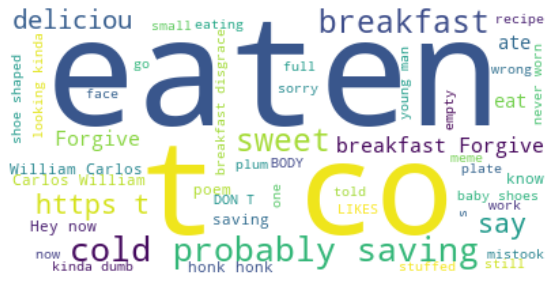

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create stopwords list
stopwords = STOPWORDS.update(["plums", "icebox"])

# Set up wordcloud
wc = WordCloud(background_color="white", max_words=50,
               stopwords=stopwords, contour_width=5, contour_color='steelblue')

# Strip line breaks
tweet_texts = clean_tweets_df['text'].str.replace(r"\\n", " ", regex=True)
# Join all tweet texts together
tweet_texts = ' '.join(tweet_texts)
# Generate word cloud
wc.generate(tweet_texts)

# Create and save word cloud
plt.figure(figsize = (10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("tweet_word-cloud.png", dpi=300)
plt.show()

## Your Turn!

You might want to limit your search to 5000 tweets or less

In [30]:
!twarc2 search --archive --limit 5000 "YOUR QUERY" > my_tweets.jsonl

In [31]:
!twarc2 csv my_tweets.jsonl my_tweets.csv

100%|██████████████| Processed 3.36M/3.36M of input file [00:00<00:00, 7.44MB/s]

ℹ️
Parsed 1550 tweets objects from 17 lines in the input file.
Wrote 1550 rows and output 74 columns in the CSV.



Now we're ready to explore the data!

In [ ]:
my_tweets_df = pd.read_csv('my_tweets.csv', parse_dates = ['created_at'])
my_tweets_df

Let's apply the helper functions and create new columns.

In [37]:
# Create tweet type column
my_tweets_df['type'] =my_tweets_df.apply(find_type, axis =1)
# Create tweet URL column
my_tweets_df['tweet_url'] = my_tweets_df[['author.username', 'id']].apply(make_tweet_url, axis='columns')

Let's select and rename only the columns we're interested in.

Pick another new column that you find intriguing and add it below!!

In [ ]:
# Select columns of interest
my_clean_tweets_df = my_tweets_df[['created_at', 'author.username', 'author.name', 'author.description',
                             'author.verified', 'type', 'text', 'public_metrics.retweet_count', 
                             'public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.quote_count',
                             'tweet_url', 'lang', 'source', 'geo.full_name']]

# Rename columns for convenience
my_clean_tweets_df = my_clean_tweets_df.rename(columns={'created_at': 'date', 'public_metrics.retweet_count': 'retweets', 
                          'author.username': 'username', 'author.name': 'name', 'author.verified': 'verified', 
                          'public_metrics.like_count': 'likes', 'public_metrics.quote_count': 'quotes', 
                          'public_metrics.reply_count': 'replies', 'author.description': 'user_bio'})

my_clean_tweets_df

Let's get an overview of some of these columns.

In [40]:
my_clean_tweets_df['type'].value_counts()

retweet     820
original    567
reply       128
quote        35
Name: type, dtype: int64

In [ ]:
clean_tweets_df['YOUR COLUMN OF INTEREST HERE'].value_counts()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create stopwords list
stopwords = STOPWORDS.update(["plums", "icebox"])

# Set up wordcloud
wc = WordCloud(background_color="white", max_words=50,
               stopwords=stopwords, contour_width=5, contour_color='steelblue')

# Strip line breaks
tweet_texts = my_clean_tweets_df['text'].str.replace(r"\\n", " ", regex=True)
# Join all tweet texts together
tweet_texts = ' '.join(tweet_texts)
# Generate word cloud
wc.generate(tweet_texts)

# Create and save word cloud
plt.figure(figsize = (10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig("my_tweet_word-cloud.png", dpi=300)
plt.show()